In [1]:
from scipy.interpolate import interp2d
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Monolingual vs Multilingual

## Data Points

In [10]:
# Learning rate
X = np.array([1e-05, 3e-05, 5e-05, 7e-05, 9e-05, 1e-04])

# Epoch
Y = np.linspace(1,9,9)

# F1-SCORES
Z_infoXLM_1 = np.array([[59, 83, 88, 83, 87, 10],
[87,90,90,9,10,10],
[88,88,91,92,10,9],
[92,10,91,90,10,10],
[91,92,10,92,9,82],
[91,91,91,10,91,10],
[91,92,91,94,10,10],
[88,92,92,90,10,91],
[90,91,92,92,10,10]])

Z_infoXLM_2 = np.array([[0.7150535110327582, 0.6569799441342706, 0.10306917086578103, 0.10306917086578103, 0.10306917086578103, 0.10306917086578103], 
[0.8898185991920239, 0.9160030683810637, 0.8977754237288136, 0.10306917086578103, 0.8560408779506017, 0.12890276538804638], 
[0.8819054827764145, 0.9237134599903807, 0.890787315472936, 0.8537518272687764, 0.10306917086578103, 0.8810550922943254], 
[0.8814315980629541, 0.9071888633184576, 0.10306917086578103, 0.3460268545014308, 0.10306917086578103, 0.10306917086578103], 
[0.9074505322989875, 0.9233069190696309, 0.9152542372881356, 0.876047431073492, 0.10306917086578103, 0.10306917086578103], 
[0.9160030683810637, 0.9236713198261388, 0.8975943138326954, 0.8977571770334928, 0.10306917086578103, 0.10306917086578103], 
[0.8984609001470342, 0.9153948059742459, 0.10306917086578103, 0.9234958198181735, 0.9061777622211076, 0.10306917086578103], 
[0.9069988310929281, 0.932148305467276, 0.9153883779134144, 0.8807657997666918, 0.8799806567198094, 0.8525194324538229], 
[0.9069630934037713, 0.9062221231043711, 0.9233652083135876, 0.906555366495039, 0.8906942497486654, 0.10306917086578103]])

Z_XLMR_1 = [[80,92,91,86,90,82],
[89,91,91,86,90,89],
[91,90,91,90,91,10],
[91,92,91,92,89,11],
[94,92,93,91,88,86],
[91,92,89,91,89,10],
[90,94,90,91,29,89],
[93,90,93,93,90,9],
[91,92,92,92,92,26]]

Z_XLMR_2 = [[0.7879057114051692, 0.9156224451319173, 0.6842360137632216, 0.8717487072376651, 0.10306917086578103, 0.1472087234799099], 
[0.9157426348546689, 0.8980996404725219, 0.8985808502848032, 0.8804943177380301, 0.10306917086578103, 0.0852133255406195], 
[0.9157838983050848, 0.8982317117910339, 0.9239209497015027, 0.873719181702567, 0.10306917086578103, 0.10306917086578103], 
[0.9236713198261389, 0.9239558111380146, 0.8895570089090524, 0.9406190271708471, 0.10306917086578103, 0.8899463763481227], 
[0.9154463734303162, 0.9323665771712935, 0.9065806628696905, 0.8896035108958837, 0.25402420292814587, 0.9160396808937561], 
[0.914951573849879, 0.9067497642756939, 0.9322033898305084, 0.9072672781913105, 0.10306917086578103, 0.8895010282042188], 
[0.8980996404725218, 0.9238663878494388, 0.8982751880045075, 0.8805992736077483, 0.10306917086578103, 0.10306917086578103], 
[0.9160078645858594, 0.9324050375906765, 0.9072471337912303, 0.9057857229746168, 0.906463194240574, 0.10306917086578103], 
[0.9237943579648471, 0.9152542372881356, 0.9066154184798252, 0.8983231527578318, 0.9071606359741953, 0.0852133255406195]]

Z_XLMR_3 = np.array([[0.7397377249387882, 0.9146668868542353, 0.8231700364767237, 0.8904358353510897, 0.9074178274891923, 0.9069988310929281, 0.0852133255406195, 0.10306917086578103], 
[0.8976857282468995, 0.8989822243475079, 0.9056384710038503, 0.8980996404725219, 0.8990926054142502, 0.10306917086578103, 0.8716188469482619, 0.0852133255406195], 
[0.8632193422634645, 0.9153937843416576, 0.915332548807125, 0.9068310220852593, 0.9160030683810637, 0.9065806628696905, 0.9164652067266258, 0.863628785773826], 
[0.9067796610169492, 0.9155708698081579, 0.9238828967642527, 0.9157741936274225, 0.914787331312755, 0.915765651609764, 0.8813210292404705, 0.9069717971591298], 
[0.915332548807125, 0.9405128769535549, 0.9410723457333627, 0.9151515151515152, 0.9156232104800195, 0.9074178274891923, 0.10306917086578103, 0.891102236941239], 
[0.9066604299655148, 0.9321277239709443, 0.9153937843416576, 0.8979932219776706, 0.898628450359553, 0.8985105290190035, 0.9156224451319173, 0.8977920958673616], 
[0.9236589681504936, 0.9323409641206252, 0.923758939206444, 0.9324594896628795, 0.9151350062367012, 0.9064036246239636, 0.8814896647963485, 0.8975983057852205], 
[0.9238683606128442, 0.9574594896628795, 0.9406870702375492, 0.9322335154776306, 0.9061009611857069, 0.9321888536790998, 0.906382514562323, 0.8986077481840193], 
[0.9236713198261389, 0.9153937843416576, 0.8978079545840485, 0.957654003365455, 0.8896035108958837, 0.9067497642756939, 0.8898305084745762, 0.5651878768284269]])

Z_XLMR_4 = np.array([[0.7182471321398801, 0.9078460439255105, 0.9077521533759377, 0.8808073253430881, 0.8897202084754182, 0.8979744226033904, 0.899410723992287, 0.8735367577684887], 
[0.8980058493881778, 0.9071606359741953, 0.8984292712094382, 0.9242724317991219, 0.9069630934037713, 0.9153692847939057, 0.0852133255406195, 0.8647689410401275], 
[0.923888410099269, 0.9322033898305084, 0.9241953274866318, 0.8892898736706162, 0.2738484736902527, 0.914787331312755, 0.0852133255406195, 0.9069038474806246], 
[0.8900775406573801, 0.907021382647728, 0.9151350062367012, 0.914638751079429, 0.9323677673874927, 0.8727025898078531, 0.8982307840985363, 0.12890276538804638], 
[0.9064668382464993, 0.9151515151515152, 0.923728813559322, 0.9319507978661773, 0.9066213921901527, 0.9067727089445364, 0.889800611733321, 0.0852133255406195], 
[0.9318249547063107, 0.9239209497015027, 0.9143661715257273, 0.924119759526152, 0.8899744323473139, 0.9407469585815147, 0.8911339340292087, 0.0852133255406195], 
[0.9151515151515152, 0.923728813559322, 0.9064201335387777, 0.9492979038869669, 0.8982751880045075, 0.9065587371783537, 0.8982317117910339, 0.8819041152278727], 
[0.923728813559322, 0.9153508267598832, 0.9318308809834234, 0.8987370509742671, 0.9236045160782906, 0.914787331312755, 0.9232056495879779, 0.915079803471233], 
[0.9324594896628795, 0.9322104110204598, 0.9154071828812169, 0.9067098156081207, 0.9236530418733808, 0.8897791474062661, 0.9235543797424195, 0.8981487017915047]])

Z_CBERT = [[76.32,82.84,89.81,88.29,86.00,88.88],
[83.80,86.39,87.28,89.87,87.25,88.05],
[86.48,89.81,90.72,89.81,90.67,88.08],
[85.51,88.95,86.45,86.39,88.10,89.05],
[85.57,89.87,90.73,86.41,85.65,87.33],
[88.21,90.60,88.16,88.13,87.28,85.60],
[86.35,86.36,92.43,85.48,85.65,85.48],
[89.84,89.83,88.99,87.26,84.62,84.75],
[89.00,87.27,84.72,89.84,85.45,90.68]]

Z_CBERTWE = [[89.05,85.73,90.79,89.10,87.49,88.19],
[87.45,89.87,89.83,88.19,90.68,88.15],
[88.15,89.86,93.24,87.34,90.63,84.83],
[89.91,89.91,90.73,89.81,92.43,88.89],
[88.97,88.99,88.13,86.42,89.87,88.20],
[89.02,89.37,91.48,88.89,89.78,88.07],
[88.20,89.84,88.13,87.26,86.54,88.18],
[89.88,90.72,89.80,86.46,87.34,85.58],
[88.09,90.62,89.86,88.15,89.03,87.39]]



In [17]:
xlmr_ave = np.sum([Z_XLMR_3,Z_XLMR_4], axis=0)/2
xlmr_max = np.max(xlmr_ave)
print(np.max(Z_XLMR_4))
print(np.where(Z_XLMR_4==np.max(Z_XLMR_4)))

0.9492979038869669
(array([6]), array([3]))


In [ ]:
# Interpolate
x = np.linspace(1e-05, 1e-04, 100)
y = np.linspace(1,10,100)

# InfoXLM
z_info_func = interp2d(X,Y,Z_infoXLM_1,kind = 'linear')
z_infoXLM = z_info_func(x,y)

# XLM-R
z_XLMR_func = interp2d(X,Y,Z_XLMR_1,kind = 'linear')
z_XLMR = z_XLMR_func(x,y)

## XLM-R Figures

0.9406190271708471
(array([3]), array([3]))


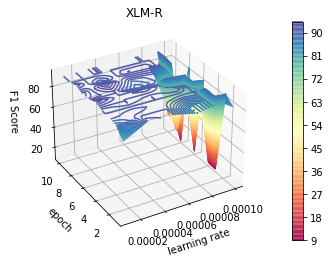

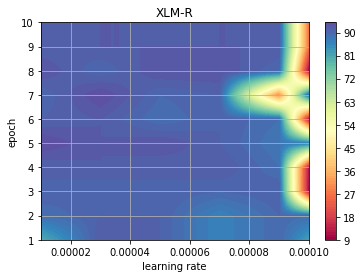

In [7]:
# max F1 score
print(np.max(Z_XLMR_2))
print(np.where(Z_XLMR_2==np.max(Z_XLMR_2)))

# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_XLMR, 200, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.view_init(elev=30.,azim=-120)
ax.set_title('XLM-R')
axins = inset_axes(ax,
                    width="5%",  
                    height="100%",
                    loc='right',
                    borderpad=-5
                   )
cbar = plt.colorbar(cs, cax=axins, orientation="vertical")
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_XLMR, 100, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('XLM-R')
plt.grid()
cbar = plt.colorbar(cs)

plt.show()

## InfoXLM Figures

0.932148305467276
(array([7]), array([1]))


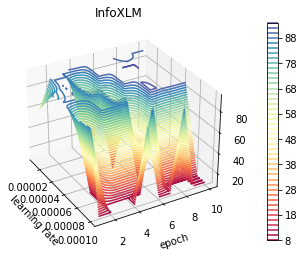

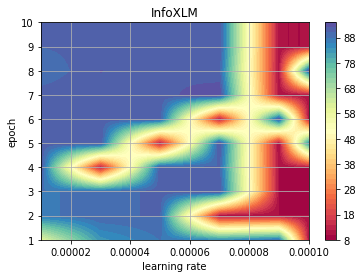

In [8]:
# max F1 score
print(np.max(Z_infoXLM_2))
print(np.where(Z_infoXLM_2==np.max(Z_infoXLM_2)))

# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

cs = ax.contour3D(x, y, z_infoXLM,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.view_init(elev=30.,azim=-30)
ax.set_title('InfoXLM')
axins = inset_axes(ax,
                    width="5%",  
                    height="100%",
                    loc='right',
                    borderpad=-5
                   )
cbar = plt.colorbar(cs, cax=axins, orientation="vertical")
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_infoXLM,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('InfoXLM')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()

## CBERT Figures

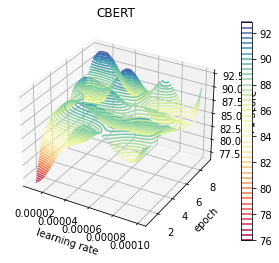

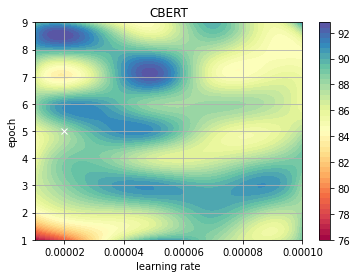

In [13]:
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_CBERT,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.set_title('CBERT')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_CBERT,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('CBERT')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()

## Chinese-BERT-WWM-EXT Figures

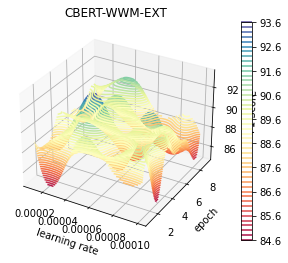

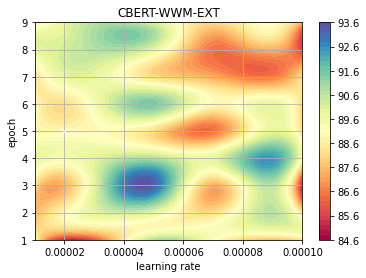

In [9]:
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_CBERTWE,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.set_title('CBERT-WWM-EXT')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_CBERTWE,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('CBERT-WWM-EXT')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()

# Hyperparameter Tuning

In [2]:
# Dict of F1-Performance
train = {'single': 
[[0.8072108443787246, 0.8893863028456542, 0.8756553860749929, 0.8847059900085796, 0.9043392962392343, 0.1015300123318707, 0.8786285166757802], 
[0.8952883632322115, 0.9298842432457783, 0.9357283615809805, 0.9378283922774623, 0.9512293746501731, 0.9341371409513255, 0.9274532163785086], 
[0.9210358645308684, 0.9497811151425071, 0.9623853091533786, 0.9666220614221189, 0.9274998827545649, 0.9587757613814046, 0.9129429253376835], 
[0.9519192863500139, 0.975142168754464, 0.9767433836032606, 0.9756541821687151, 0.969846031168691, 0.9698139228286007, 0.95279639666419], 
[0.9613717135188736, 0.9820161890993405, 0.9862275188910229, 0.9872807397861036, 0.985170484743432, 0.9840964704711743, 0.977227024486559], 
[0.9671515415946037, 0.9820286535838563, 0.9910010472169182, 0.9904580958248896, 0.9883531287016593, 0.9777683284161756, 0.97249303869372], 
[0.9762037463498674, 0.9899394256524277, 0.9909984149802201, 0.9931141512765866, 0.1015300123318707, 0.9883329259754565, 0.09659115486377957], 
[0.9819894418670742, 0.9931120080115023, 0.9941720155324602, 0.9947028619986648, 0.9941730722559708, 0.9920662093345715, 0.9936418249898256], 
[0.9867607646427421, 0.9931138251191339, 0.9957637869767115, 0.997353327012129, 0.994703176472389, 0.9915206243546335, 0.9946999661263191], 
[0.9894093581541881, 0.9920499375478554, 0.995760464750669, 0.1015300123318707, 0.9968241913899489, 0.995765427202611, 0.9936461344209025]], 
'sentiment40k': 
[[0.8829422230716693, 0.9052550167154356, 0.9171077385562767, 0.9118480944534657, 0.9325686936046039, 0.9331450375049238, 0.9059142230702784], 
[0.9238989623220661, 0.948230682459865, 0.9572286192993503, 0.9634247139444128, 0.9656542170659069, 0.9613913122242567, 0.9572158334512616], 
[0.9510496160396456, 0.9740656113880483, 0.9740488818683024, 0.9772710622642562, 0.9778202876023226, 0.976194546510611, 0.9751207541839733], 
[0.9615480524060325, 0.97991332252891, 0.9856815379518212, 0.9862172896133812, 0.9888765830837002, 0.9825016426249324, 0.9830497405909115], 
[0.9720463268785681, 0.9878303720827275, 0.988883810455006, 0.9909846950808335, 0.9862018229499664, 0.9888767186943805, 0.9888738488927576], 
[0.9819900260899582, 0.9936451311461982, 0.9962917347909007, 0.995232881118519, 0.9931034325491092, 0.9893986483985091, 0.9915246805652561], 
[0.9899444048923488, 0.994703714320866, 0.9957604754647722, 0.9952260863369611, 0.9957603671542641, 0.9946992242862795, 0.9925816280832873], 
[0.9915271386494189, 0.995763114741973, 0.9973499888273518, 0.9962900204118108, 0.996822552413727, 0.9962944299691352, 0.9962906423054108],
 [0.9915225874826019, 0.9978813348740473, 0.9962923071235786, 0.9984109851894295, 0.9973516420595684, 0.9968214382108574, 0.9952290596607669], 
 [0.995230195500972, 0.9973516419823826, 0.9984109851894295, 0.9984109851894295, 0.998940666203385, 0.9978812900592345, 0.9984098854905417]], 
 'twitter': 
 [[0.8740808193965116, 0.8885356763758959, 0.8941981066156507, 0.8947214813036464, 0.8980013417192533, 0.8916740504416989, 0.8853788976204355], 
 [0.9072023250927448, 0.9314018985844754, 0.9400504958903136, 0.9305976594950388, 0.9316982656473255, 0.9278153119204448, 0.9413015880947911], 
 [0.9300294347462557, 0.9459326890348384, 0.9586986950015174, 0.9687004335860194, 0.9681682834710418, 0.9534388839711267, 0.9538727815179092], 
 [0.9471742293850426, 0.9687813618965453, 0.9788035812786402, 0.974551105168912, 0.9809189784729742, 0.9745538167317743, 0.6119161449474574], 
 [0.9576835100149782, 0.98148024490408, 0.9756627066162836, 0.9830272720275905, 0.982510615949071, 0.978269905600469, 0.9846287267377202], 
 [0.9650813475969413, 0.9851626729635211, 0.9835769322115344, 0.990470101888718, 0.988876113474849, 0.9857093319961613, 0.9851659968125871], 
 [0.9714067837223541, 0.9899338349733764, 0.9904659926332937, 0.9888736540846345, 0.9888715003603458, 0.1015300123318707, 0.9888788355157043], 
 [0.9777962367217566, 0.9915289279085988, 0.9909972730184777, 0.9931165905908201, 0.9936461344209025, 0.9936416564476692, 0.9814794823815486], 
 [0.9835779206859385, 0.9920575932537277, 0.9925832995616769, 0.9947004948545367, 0.9925873331949445, 0.9947000387880177, 0.9936456575471876], 
 [0.988354083151225, 0.9941720162092894, 0.9973522452282059, 0.9957597798803023, 0.9957626130549533, 0.9947033295067473, 0.9894066489795132]]}

val = {'single': 
[[0.7768116060485405, 0.8663857595133562, 0.8762489294890096, 0.884882592031607, 0.8680116075635312, 0.08607627172598205, 0.8698442270868914], 
[0.8584436674610058, 0.9110260345024079, 0.9291532582461787, 0.911763183770636, 0.8847781811252705, 0.8507725786472341, 0.8753440237418929], 
[0.9122906682685817, 0.9117037801626213, 0.8936120260882325, 0.902993345367109, 0.911763183770636, 0.8755728937395325, 0.8584225053720091], 
[0.9117643418528375, 0.9204575441930992, 0.9201009932350723, 0.9117037801626213, 0.8941394888297544, 0.885170027212925, 0.894008384273871], 
[0.9206261413119821, 0.9201009932350723, 0.9468229066721826, 0.9293823187628497, 0.9201955503247856, 0.9201311962373909, 0.9202278917001006], 
[0.8935859806842573, 0.9114150353088406, 0.9293823187628497, 0.9116213187009646, 0.9201718301735, 0.9295679738157615, 0.8846315227342082], 
[0.911478172208328, 0.9292187191669576, 0.9291532582461787, 0.8752517143901349, 0.08607627172598205, 0.929090374125795, 0.09216182048040455],
[0.9292186285826374, 0.9200222337443207, 0.9292035398230089, 0.9016303544748552, 0.9103820373982338, 0.8761037931821184, 0.9202049998510176],
[0.9291435021193309, 0.9201009932350723, 0.8758948688152228, 0.9017327221117503, 0.9114123367588053, 0.9114123367588053, 0.858815414191594], 
[0.9292349984633663, 0.8849233696119654, 0.9110619469026547, 0.08607627172598205, 0.8938778049205991, 0.8851227249958258, 0.902338811630847]], 
'sentiment40k': 
[[0.8601107312094434, 0.8773110524801628, 0.886064719320425, 0.9039003178046227, 0.8941379998669239, 0.8670941098575541, 0.8945200335844438], 
[0.8855189058728882, 0.9027358237576972, 0.9385559131134353, 0.911976911976912, 0.893569523925176, 0.9039898154942403, 0.9114694128218923], 
[0.8773014596023445, 0.8944473871937638, 0.9117881790448162, 0.9204976439489714, 0.9030168946098149, 0.9113829787627639, 0.893144678985387], 
[0.9117881790448162, 0.9114184084963847, 0.912059719134202, 0.9113837489943685, 0.9294577371948074, 0.9028118715156892, 0.8678507644915989],
[0.9117881790448162, 0.9027358237576972, 0.947486693440899, 0.8854023490150507, 0.9025592936095524, 0.9202900372294263, 0.9030895358328985], 
[0.9117881790448162, 0.8937740901286008, 0.9113374519953248, 0.8935296792472629, 0.9197231480417322, 0.9210690980602485, 0.8937740901286008], 
[0.9116265392024682, 0.9116265392024682, 0.9032443396124593, 0.8670076726342711, 0.9023633200624352, 0.8670986093552465, 0.9020585358872218], 
[0.9027358237576972, 0.9292035398230089, 0.8938159519558752, 0.89255587345946, 0.8848861959259995, 0.8939263045051193, 0.8935819744335045], 
[0.9116265392024682, 0.8938159519558752, 0.9027842190778161, 0.8937953412101289, 0.8939349911744575, 0.9029192177551235, 0.9029615039624194], 
[0.8940075853350189, 0.9114123367588053, 0.9203539823008849, 0.8930914552136794, 0.8843987870536543, 0.9019537984139754, 0.8583502910415975]], 
'twitter': 
[[0.8767580858493733, 0.8859982788145203, 0.8938053097345132, 0.8425469760994708, 0.8845257851803789, 0.8755559703586129, 0.8583075806527135],
[0.8857648356374348, 0.9122153214765563, 0.9032607259377844, 0.8940116540970982, 0.9033255763081623, 0.8845147641607819, 0.9288317713096473], 
[0.903390019541147, 0.8940471672814301, 0.9115981093899722, 0.9292187191669576, 0.9296025999565823, 0.903438121404393, 0.9026246897373802], 
[0.9120957546592717, 0.9030739505944049, 0.9027016903123098, 0.9028145803538371, 0.9114666061568717, 0.8847772393126376, 0.8929640407766973],
[0.9033974874682839, 0.8935675000126495, 0.9027058439704744, 0.9379609807957301, 0.8758739778036024, 0.9026448987322528, 0.9200506965993691], 
[0.921022340491367, 0.9200387190034878, 0.9201431148333803, 0.9200506965993691, 0.8937755132445397, 0.9203161636789956, 0.9198364643171351], 
[0.9117037801626213, 0.9122379040794835, 0.9018030938792319, 0.9026570642669454, 0.9102034509044229, 0.08607627172598205, 0.9017857142857144],
[0.9294577371948074, 0.9293823187628497, 0.9295480358679558, 0.9204412068892472, 0.8845509697070892, 0.9378321585955981, 0.9208815359503932], 
[0.9213971868839125, 0.9296477886225757, 0.9028571428571428, 0.9115057017711885, 0.9559259181152319, 0.9024470638816238, 0.8847057043002483], 
[0.9294577371948074, 0.9204060570206157, 0.9292035398230089, 0.94688372533245, 0.9107725064874577, 0.902353000204809, 0.9203224330762072]]}

test = {'single': [[0.7604784806526266, 0.8786142350505568, 0.8777937332917461, 0.8249271955783999, 0.8776055327992905, 0.1031775242301558, 0.8528010169382142], 
[0.8596491228070176, 0.9031125657235886, 0.895337592940869, 0.9123528129787384, 0.868421052631579, 0.8260239957905174, 0.8684780132148554], 
[0.8953162476082681, 0.9122357174988753, 0.8770849075647065, 0.8865145319438948, 0.8865656631163076, 0.8942406983441773, 0.8505496538237937], 
[0.9122881914485667, 0.8949632913806256, 0.9042286422578186, 0.9124248731742041, 0.8954144498325227, 0.8525446681219178, 0.8951249213804917], 
[0.8947454941986224, 0.9034990461820188, 0.9301642678804399, 0.9212804919561118, 0.9301667118859094, 0.9123556244206444, 0.9124248731742041], 
[0.8941325794039887, 0.894689168573608, 0.9299086196524017, 0.9028789923526765, 0.9214217169853104, 0.9038924252345615, 0.860028597279648], 
[0.9120331723248374, 0.9210733690017004, 0.9209537789260862, 0.8851487270808601, 0.1162734422262553, 0.9118337449194833, 0.07322654462242563], 
[0.921070597641056, 0.9031878188880865, 0.9298473605055203, 0.9385184867609747, 0.9209408304559976, 0.8692020331265015, 0.912372894605869], 
[0.9213583961591706, 0.9121271738783087, 0.877921621095345, 0.8851534153911956, 0.9121307803866135, 0.8856719489386331, 0.851036225788897], 
[0.9301642678804399, 0.8857176004079256, 0.9119755653910188, 0.1162734422262553, 0.9033428725477999, 0.9207308352402747, 0.894127896179502]], 
'sentiment40k': 
[[0.8777530681163, 0.8708565373385317, 0.8783983917911413, 0.913751852731994, 0.8700209411282638, 0.8953071991912093, 0.8947267277207696], 
[0.896707395200219, 0.88723749240968, 0.9207308352402747, 0.9047159527015963, 0.8863995007508777, 0.9303643724696355, 0.8873521339575033], 
[0.8786005040707073, 0.9048537741207785, 0.9134793348078653, 0.9125222328403884, 0.887874201996746, 0.9216460672218952, 0.8858077809230454],
[0.9043260167300621, 0.9045592406576387, 0.9127144016340693, 0.9038818402522387, 0.9047578820124493, 0.8962100865105221, 0.8939688381793646],
[0.9130471382189671, 0.9128336542176643, 0.9222250202859621, 0.8861445911344243, 0.9040963653152019, 0.8950873410853927, 0.8944710260499734], 
[0.9128336542176643, 0.8953895214280648, 0.9210133938081062, 0.903769233243903, 0.8685854559033122, 0.92946536600121, 0.894689168573608], 
[0.9039967116247843, 0.8869764362383563, 0.8865801207928645, 0.8858248875973732, 0.8774669469629676, 0.9030626258065729, 0.8953365820550496], 
[0.8955639173755591, 0.9126910844362368, 0.8863154112608312, 0.8777018222034421, 0.8940468088324259, 0.9046693831667487, 0.8955639173755591], 
[0.9038874590942725, 0.8606943167543557, 0.8867481203007519, 0.8952864617684562, 0.8863312279392023, 0.8951031577637637, 0.904481105555514], 
[0.9037496487213458, 0.8951031577637637, 0.9121307803866135, 0.8950873410853927, 0.929513048157116, 0.8857737564249607, 0.8607064536340853]],
'twitter': 
[[0.8853846572954125, 0.861628993154032, 0.8867851945752278, 0.859473406275767, 0.8938062907191132, 0.8782973946734743, 0.8685583744236733], 
[0.8863875535642166, 0.9033689147625852, 0.894922592864894, 0.8858488634595602, 0.8864344786451254, 0.8951705419849464, 0.9041983747081341], 
[0.8776085657455782, 0.8778334209216585, 0.8677095236876466, 0.9038938201411639, 0.8870068994089152, 0.9048589827452307, 0.8954178874184469], 
[0.8685143239087507, 0.8783936950412925, 0.9038818402522387, 0.8787172609887292, 0.9124379047978368, 0.8780598882075206, 0.8602715171706508], 
[0.8870841377766586, 0.895292577413479, 0.8785011245001281, 0.9126620781949787, 0.9045487479186142, 0.9123247563749715, 0.8864999065209209], 
[0.9125125736794844, 0.9123247563749715, 0.9036389078704485, 0.8863312279392023, 0.8948968165093585, 0.9295444468411467, 0.8693188444031514], 
[0.8871354380977319, 0.8946259034901695, 0.9115299367543752, 0.886197426182143, 0.9038804344352606, 0.1162734422262553, 0.8782268170426065],
[0.8879346172349479, 0.89593776106934, 0.8953461201935559, 0.93800057208238, 0.9033428725477999, 0.8868226793616195, 0.9030088790497275], 
[0.9215842636895268, 0.9209316285526874, 0.930624807633118, 0.9039424718095078, 0.9040970950778796, 0.8860986214780752, 0.8600090040111599], 
[0.8965302241618032, 0.8955165899496287, 0.9301906209708504, 0.9126910844362368, 0.9118801847233096, 0.9036708386589583, 0.9209316285526874]]}

In [16]:
for (exp,result)in test.items():
    print(exp)
    print(max(result))



single
[0.9301642678804399, 0.8857176004079256, 0.9119755653910188, 0.1162734422262553, 0.9033428725477999, 0.9207308352402747, 0.894127896179502]
sentiment40k
[0.9130471382189671, 0.9128336542176643, 0.9222250202859621, 0.8861445911344243, 0.9040963653152019, 0.8950873410853927, 0.8944710260499734]
twitter
[0.9215842636895268, 0.9209316285526874, 0.930624807633118, 0.9039424718095078, 0.9040970950778796, 0.8860986214780752, 0.8600090040111599]


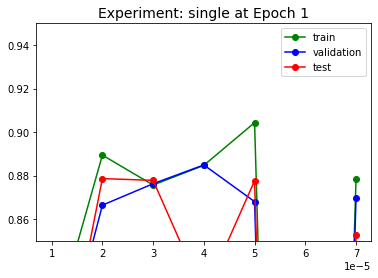

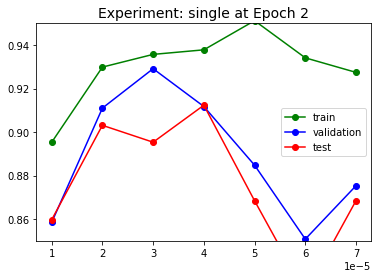

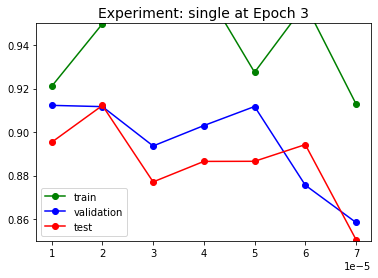

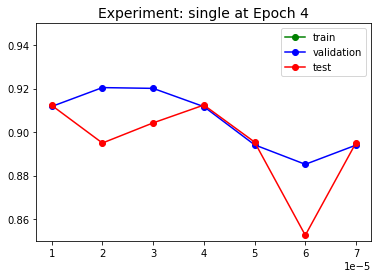

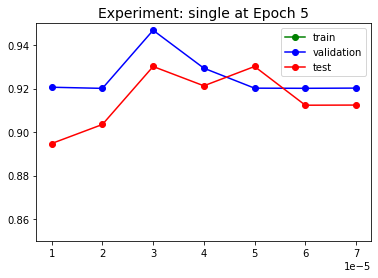

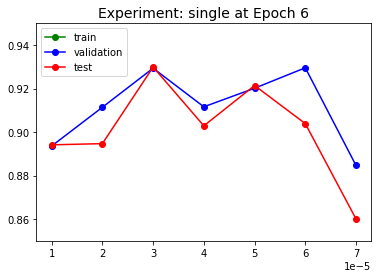

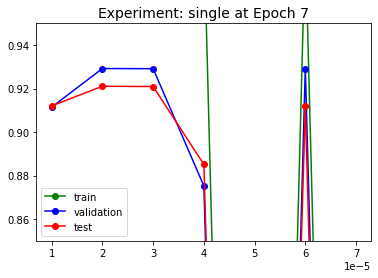

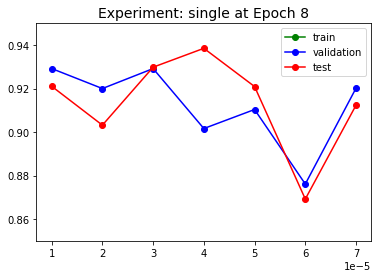

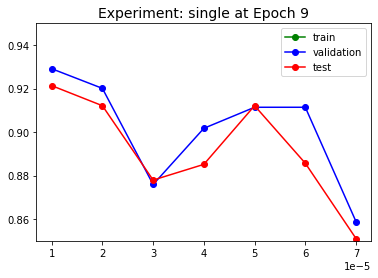

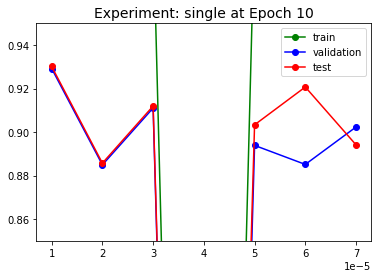

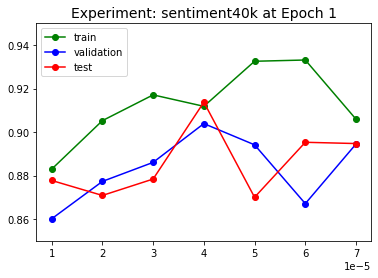

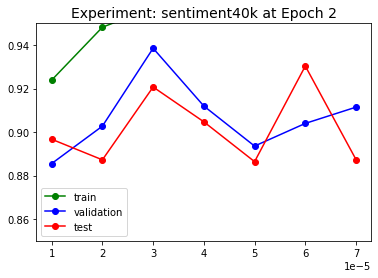

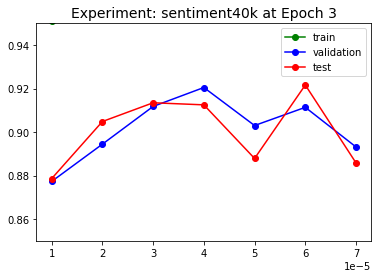

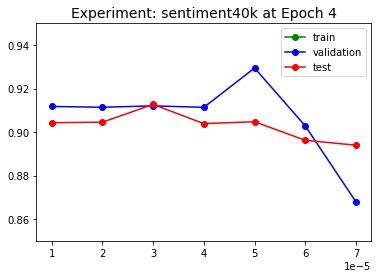

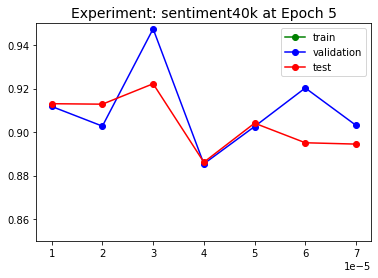

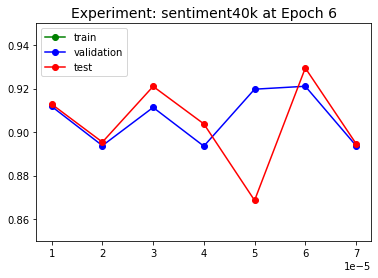

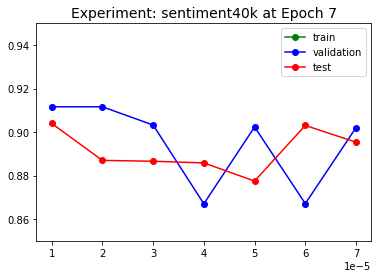

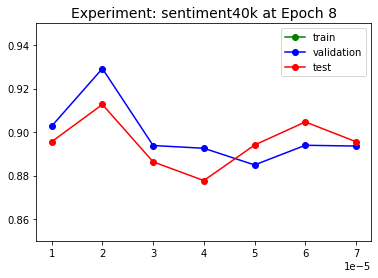

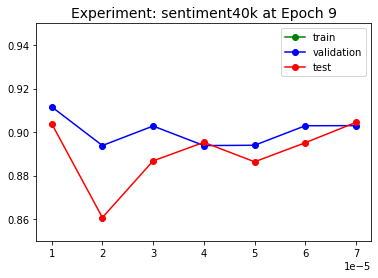

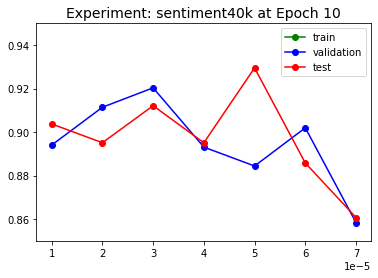

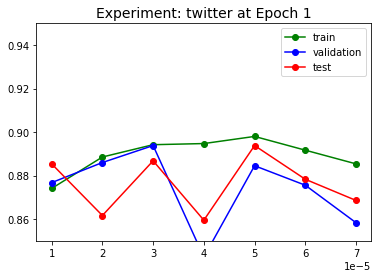

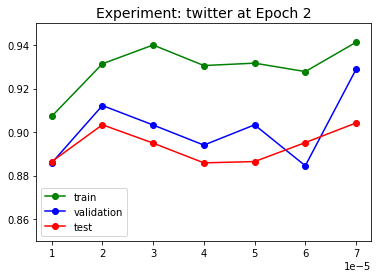

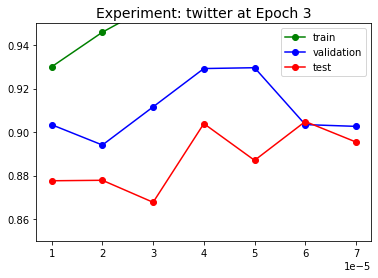

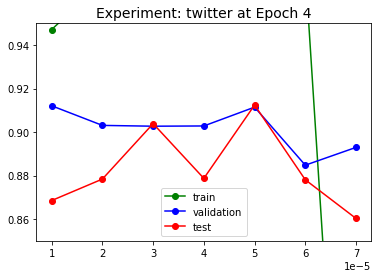

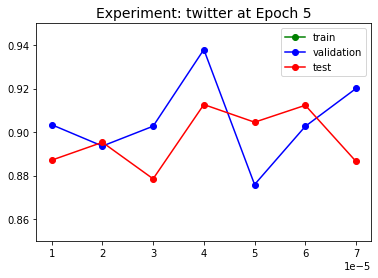

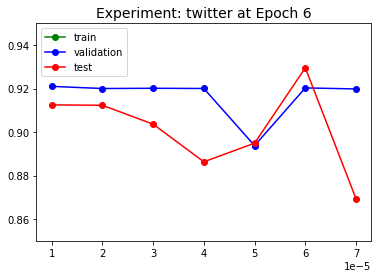

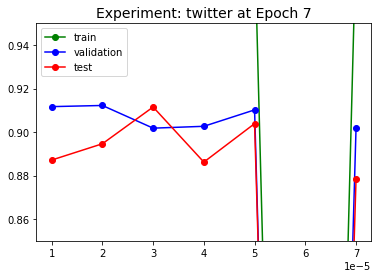

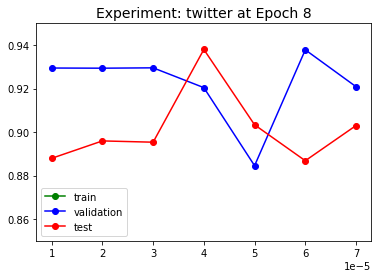

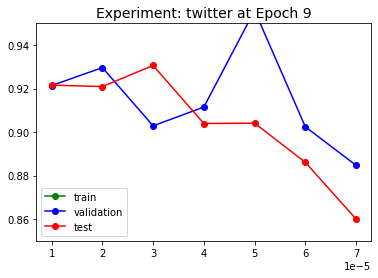

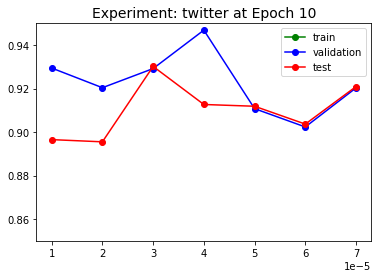

In [14]:

experiment = ['single', 'sentiment40k', 'twitter']
learning_rate = [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05]

for exp in experiment:
    train_exp = train[exp]
    val_exp = val[exp]
    test_exp = test[exp]
    # fig, axs = plt.subplots(10)
    # fig.set_figheight(15)
    # fig.suptitle(f'Train-val-test performance for {exp} experiment')

    for index in range(0,10):
        train_epoch = train_exp[index]
        val_epoch = val_exp[index]
        test_epoch = test_exp[index]

        fig = plt.plot()
        plt.plot(learning_rate, train_epoch, color='green', marker='o', label='train')
        plt.plot(learning_rate, val_epoch, color='blue', marker='o', label='validation')
        plt.plot(learning_rate, test_epoch, color='red', marker='o', label='test')
        plt.title(f'Experiment: {exp} at Epoch {index+1}', fontsize=14)
        plt.ylim(0.85,0.95)
        plt.legend()
        plt.show()
    
    




        
